In [2]:
import glob
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data_dir = '/Users/hugofluhr/phd_local/data/behav_pilot_26_02_2024'

phase = 'phase2_1'

In [4]:
data_files = glob.glob(data_dir + '/session*/data/*.mat')
print(f'{len(data_files)} data files found in {data_dir}')
data_files.pop(28)


40 data files found in /Users/hugofluhr/phd_local/data/behav_pilot_26_02_2024


'/Users/hugofluhr/phd_local/data/behav_pilot_26_02_2024/session1/data/habit_a11k6s_1_2024-02-26_14-39.mat'

In [5]:
n_trials = 192
n_subjects =39

t0 = np.zeros((n_subjects, n_trials))
t0p = np.zeros((n_subjects, n_trials))
rt1 = np.zeros((n_subjects, n_trials))
a = np.zeros((n_subjects, n_trials))

for i,f in enumerate(data_files):
    data = loadmat(f, variable_names=[phase, 'setup'])
    t0[i,:] = data[phase]['t0'][0,0]
    t0p[i,:] = data[phase]['t0p'][0,0]
    rt1[i,:] = data[phase]['rt1'][0,0]
    a[i,:] = data[phase]['a'][0,0]

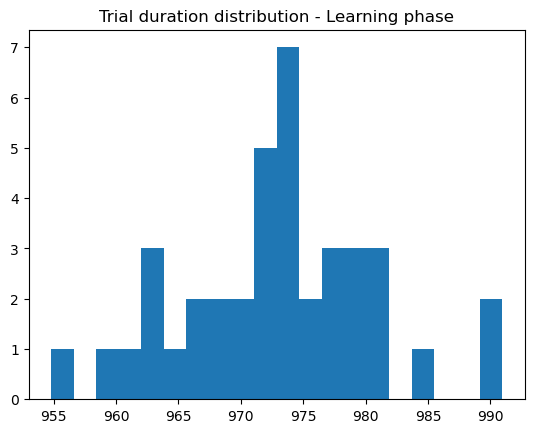

In [6]:
total_time = t0p[:,-1] - t0p[:,0]
plt.hist(total_time, bins=20)
plt.title('Trial duration distribution - Learning phase')
plt.show()


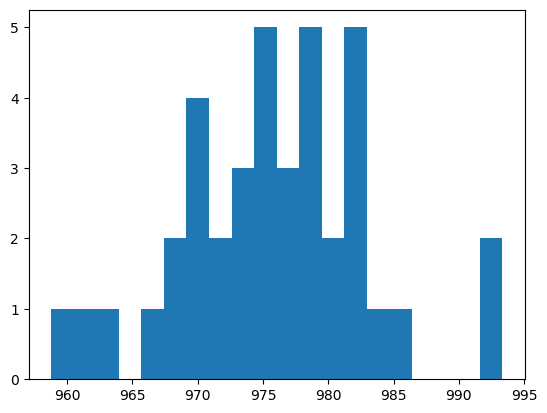

In [8]:
corrected_time = t0[:,-1] - t0[:,0] +.5 * np.sum(np.isnan(a), axis=1)
plt.hist(corrected_time, bins=20)
plt.show()